In [495]:
## introduction to networks


In [496]:
########################### Basics of NetworkX #########################################

In [497]:
import networkx as nx

In [498]:
G=nx.Graph() # insrtance of a graph

In [499]:
## A NUESTRO GRAFICO PODEMOS AGREGARLE NODOS
G.add_node(1)

In [500]:
## tambien podemos agregar un conjunto de nosos al mismo tiempo
G.add_nodes_from([2,3])

In [501]:
## no solo podemos agreegar numeros sino tamien podemos agregar String's
G.add_nodes_from(["u","v"])

In [502]:
## si queremos conocer la cantidad de nodos en nuetro grafo usamos el metodo .nodes()
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [503]:
## agregamos un puente entre cada noso así:
G.add_edge(1,2)
G.add_edge("u","v")

In [504]:
## tambien podemos agregar un conjunto de aristar o puentes al mismo tiempo
G.add_edges_from([(1,2),(1,4),(1,5),(1,6)])
## si los nodos no existen, python agragará automaticamente p.e (4,5,6)
G.add_edge("u","w")

In [505]:
## vemos cuantas aristas hay
G.edges()

EdgeView([(1, 2), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [506]:
## tambien podemos eliminar nodos de la siguiente manera
G.remove_node(2)

In [507]:
G.nodes()

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

In [508]:
G.remove_nodes_from([1,4])

In [509]:
G.nodes()

NodeView((3, 'u', 'v', 5, 6, 'w'))

In [510]:
#tambien podemos eliminar aristas con la misma logica
G.edges()
G.remove_edge("u","v")

In [511]:
G.edges()

EdgeView([('u', 'w')])

In [512]:
## tambien podemos eleiminar multiples aristas
#G.remove_edges_from([(1,2),(3,4),(2,4)])

In [513]:
## tambien podemos encontrar la cantidad de nodos y aristas de un grapho
G.number_of_nodes()

6

In [514]:
## tambien podemos encontrar la cantidad de aristas y aristas de un grapho
G.number_of_edges()

1

In [515]:
################################### Basics of NetworkX #######################################

In [516]:
G.add_edges_from([(1,2),(1,2)])

In [517]:
G.edges()

EdgeView([('u', 'w'), (1, 2)])

In [518]:
###############     question
G = nx.Graph()
G.add_nodes_from(1,2,3,4)
G.add_edges_from((1,2),(3,4))
G.number_of_nodes(), G.number_of_edges()

TypeError: add_nodes_from() takes 2 positional arguments but 5 were given

In [519]:
#################################   Graph Visualization #################################################

In [520]:
import matplotlib.pyplot as plt

In [521]:
"""
Networkx contiene muchos tipos de generadores de gráficos aleatorios."""

'\nNetworkx contiene muchos tipos de generadores de gráficos aleatorios.'

In [522]:
G=nx.karate_club_graph()

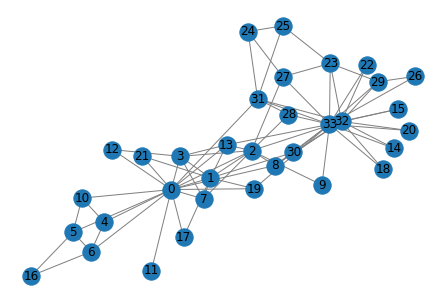

In [523]:
#primera parametro: el grafo.
# segundo parametro: mostrar los nombres de los nodos
#tercer y cuarto parametro: colorear los nodos y las aristas.

nx.draw(G,with_labels=True,node_colors="lightblue",edge_color="gray")
plt.savefig("karaoke_graph.pdf")

In [524]:

## Networkx almacena los grados de nodos en un diccionario donde
#las claves son ID de nodo y los valores son sus grados asociados.

In [525]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [526]:
G.degree()[17]

2

In [527]:
G.degree(17)

2

In [528]:
G.number_of_nodes()

34

In [529]:
#### questions

In [530]:
G.number_of_edges()

78

In [531]:
G.degree()[17] is G.degree(17)

True

In [532]:
#######################################         Random Graphs ##########################################

In [533]:
from scipy.stats import bernoulli

In [534]:
N=10
p=0.2

In [535]:
G=nx.Graph()

In [536]:
G.add_nodes_from(range(N))
for node1 in G.nodes():
    for node2 in G.nodes():
        ## los nodos solo se enlazarán una ves
        
        if node1 < node2 and bernoulli.rvs(p=p):
            G.add_edge(node1,node2)

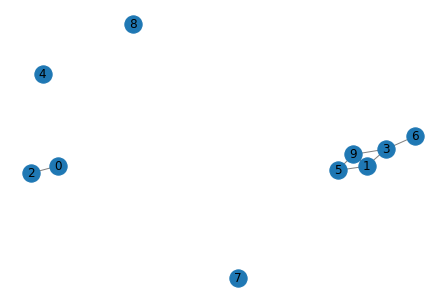

In [537]:
nx.draw(G,with_labels=True,node_colors="lightblue",edge_color="gray")

In [538]:
## converimos esto en una funcion
def er_graph(N,p):
    G=nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            ## los nodos solo se enlazarán una ves

            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1,node2)
    return G
    

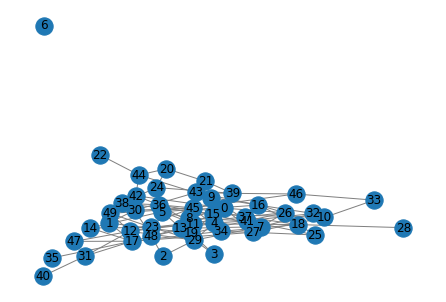

In [539]:
nx.draw(er_graph(50,0.08),with_labels=True,node_colors="lightblue",edge_color="gray")
plt.savefig("er_graph.pdf")

In [540]:
### QUESTIONS

In [541]:
G=nx.erdos_renyi_graph(10,0)

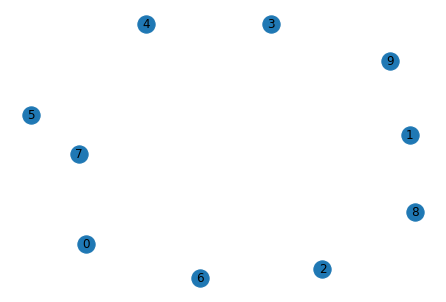

In [542]:
nx.draw(G,with_labels=True,node_colors="lightblue",edge_color="gray")


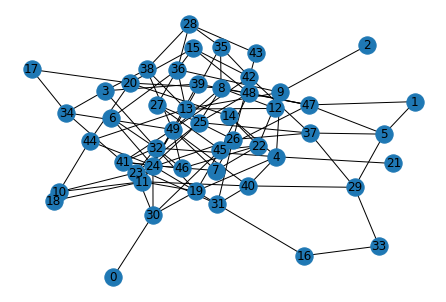

In [543]:
G=er_graph(50,0.08)
nx.draw(G,with_labels=True)

In [544]:
########  Plotting the Degree Distribution - Trazado de la distribución de grados########

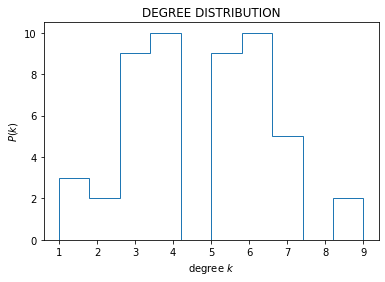

In [545]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("DEGREE DISTRIBUTION")
G=er_graph(50,0.08)
plot_degree_distribution(G)
plt.savefig("degree_distribution")

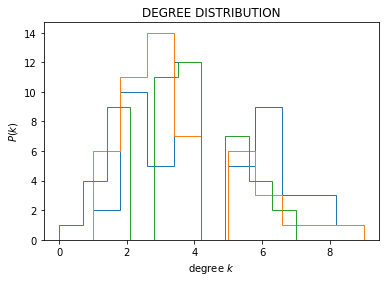

In [546]:
G1=er_graph(50,0.08)
plot_degree_distribution(G1)
G2=er_graph(50,0.08)
plot_degree_distribution(G2)
G3=er_graph(50,0.08)
plot_degree_distribution(G3)
plt.savefig("hist_3.pdf")

In [547]:
## questions

In [548]:
D = {1:1, 2:2,3:3}

TypeError: '<' not supported between instances of 'dict' and 'float'

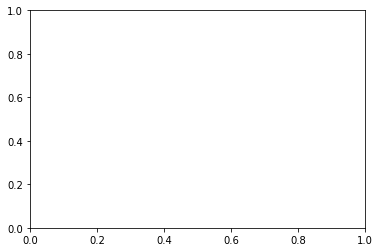

In [549]:
plt.hist(D)

In [ ]:
G=nx.erdos_renyi_graph(100, 0.03)
plot_degree_distribution(G)
G1=nx.erdos_renyi_graph(100, 0.03)
plot_degree_distribution(G1)
plt.savefig("hist_question.pdf")

In [ ]:
############### Descriptive Statistics of Empirical Social Networks ###########

In [ ]:
"""lo que haremos es traer matrices de adyacencia de un  objeto numpy para convertirlos en graphos"""

In [ ]:
import numpy as np

In [ ]:
A1=np.loadtxt("adj_allVillageRelationships_vilno_1.csv",delimiter=",")
A2=np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

In [ ]:
##convertimos nuestra matriz en objeto nx()graph
G1=nx.to_networkx_graph(A1)
G2=nx.to_networkx_graph(A2)

In [ ]:
def basic_net_stats(G):
    print("number of nodes: %d" % G.number_of_nodes())
    print("number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

In [ ]:
basic_net_stats(G1)
basic_net_stats(G2)


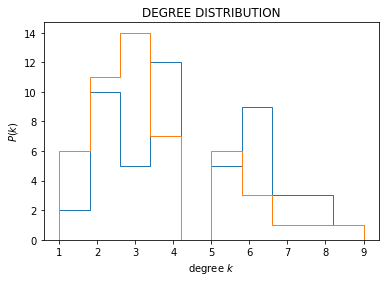

In [550]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("hist_degree.pdf")

In [551]:
#######  Finding the Largest Connected Component - Encontrar el componente conectado más grande#####

In [552]:
## CON EL MODULO NX PODEMOS ENCONTRAR LOS COMPONENTES CONECTADOS SEPARADAMENTE

In [553]:
g1=(G1.subgraph(c) for c in nx.connected_components(G1))

In [554]:
g=g1.__next__()
g.number_of_nodes()

50

In [558]:
len(g1.__next__())

StopIteration: 

In [559]:
G1=(G1.subgraph(c) for c in nx.connected_components(G1))

In [560]:
g=G1.__next__()

AttributeError: 'generator' object has no attribute 'subgraph'

In [561]:
G2=(G2.subgraph(c) for c in nx.connected_components(G2))

AttributeError: 'generator' object has no attribute 'is_directed'